In [2]:
from __future__ import division

import numpy as np
import pandas as pd
np.set_printoptions(precision=4,suppress=True)

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

datafile='data7/powerdata.xls'
data=pd.read_excel(datafile)
print(len(data))
data.head()

291


,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0


In [5]:
from random import shuffle

data=data.as_matrix()
shuffle(data)

p=0.8
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]

print(len(train),len(test))

232 59


In [7]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(train[:,:3],train[:,3])

from sklearn.externals import joblib
treefile='data7/output/treemodel01.pkl'
joblib.dump(tree,treefile)

['data7/output/treemodel01.pkl']

In [8]:
predict_result=tree.predict(test[:,:3])

In [9]:
print(len(predict_result))
predict_result

59


array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [10]:
accuracy=tree.score(test[:,:3],test[:,3])
accuracy

0.9152542372881356

In [12]:
print(predict_result)
print(test[:,3])

[0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

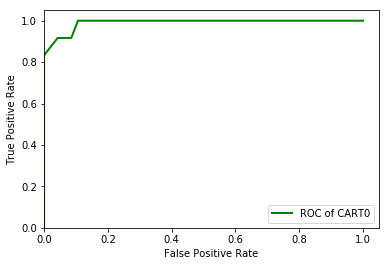

In [16]:
from sklearn.metrics import roc_curve

fqr,tqr,thresholds=roc_curve(test[:,3],tree.predict_proba(test[:,:3])[:,1],pos_label=1)
plt.plot(fqr,tqr,linewidth=2,label='ROC of CART0',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()

In [18]:
import numpy as np
import pandas as pd
from random import shuffle
from sklearn.naive_bayes import MultinomialNB

datafile='data7/powerdata.xls'
data=pd.read_excel(datafile)

data=data.as_matrix()
shuffle(data)
p=0.8
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]

clf=MultinomialNB()
clf.fit(train[:,:3],train[:,3])

accuracy=clf.score(test[:,:3],test[:,3])
accuracy

0.7966101694915254

In [20]:
#-*- coding:utf-8 -*-
import pandas as pd
from random import shuffle

datafile='data7/powerdata.xls'
data=pd.read_excel(datafile)
data=data.as_matrix()
shuffle(data)

p=0.8
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation

netfile='data7/output/net001.model'

net=Sequential()
net.add(Dense(imput_dim=3,units=10))
net.add(Activation('relu'))
net.add(Dense(input_dim=10,units=1))
net.add(Activation('sigmoid'))
net.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

net.file(train[:,:3],train[:,3],epochs=100,batch_size=1)
net.save_weights(netfile)
predict_result=net.predict_classes(train[:,:3].reshape(len(train)))